# **Таня вар 12**

## первое задание

 x     | Численное решение |   Точное решение  | Погрешность
-------|-------------------|-------------------|------------
0.00   | 0.000000000000000 | 0.000000000000000 | 0.000e+00
0.10   | 0.011990689863162 | 0.010000000000000 | 1.991e-03
0.20   | 0.044001187585659 | 0.040000000000000 | 4.001e-03
0.30   | 0.095991745058599 | 0.090000000000000 | 5.992e-03
0.40   | 0.167824777643910 | 0.160000000000000 | 7.825e-03
0.50   | 0.259268805841154 | 0.250000000000000 | 9.269e-03
0.60   | 0.370004590934731 | 0.360000000000000 | 1.000e-02
0.70   | 0.499633192226244 | 0.490000000000000 | 9.633e-03
0.80   | 0.647685599121086 | 0.640000000000000 | 7.686e-03
0.90   | 0.813633538198335 | 0.810000000000000 | 3.634e-03
1.00   | 1.000000000000000 | 1.000000000000000 | 0.000e+00


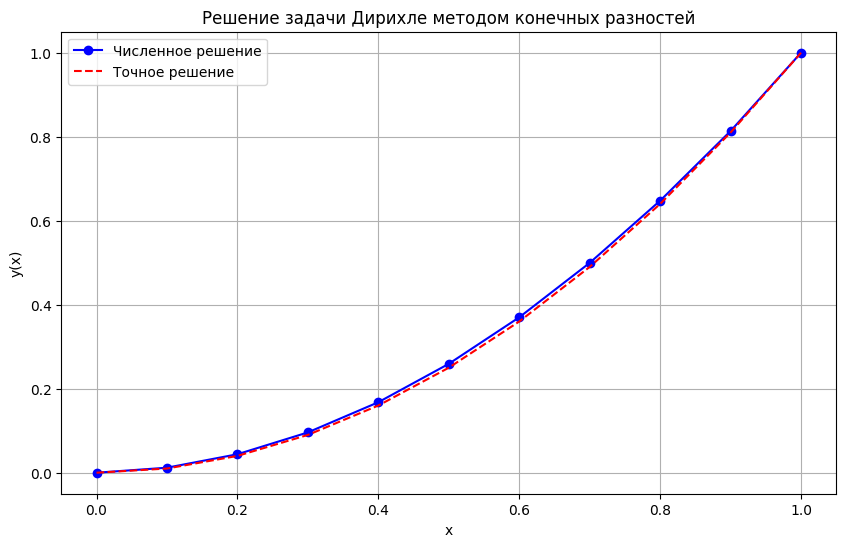

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Функции, определяющие уравнение
p = lambda x: x
q = lambda x: -2
f = lambda x: 2
exact_solution = lambda x: x**2

def sweep_method(a, b, c, d):
    n = len(d)
    # Прогоночные коэффициенты
    c_ = np.zeros(n)
    d_ = np.zeros(n)
    x = np.zeros(n)

    # Прямой ход
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    for i in range(1, n):
        denom = b[i] - a[i-1] * c_[i-1]
        c_[i] = c[i] / denom if i < n-1 else 0
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / denom

    # Обратный ход
    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x

# Параметры задачи
a = 0
b = 1
n = 11  # 10 интервалов, 11 узлов
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)

# Инициализация коэффициентов
lower = np.zeros(n-2)  # Нижняя диагональ (a_i), размер n-2
main = np.zeros(n-2)   # Главная диагональ (b_i), размер n-2
upper = np.zeros(n-2)   # Верхняя диагональ (c_i), размер n-2
rhs = np.zeros(n-2)     # Правая часть (d_i), размер n-2

# Заполнение коэффициентов
for i in range(1, n-1):
    xi = x[i]

    lower[i-1] = 1/h**2 - p(xi)/(2*h)   # a_i
    main[i-1] = -2/h**2 + q(xi)         # b_i
    upper[i-1] = 1/h**2 + p(xi)/(2*h)   # c_i
    rhs[i-1] = f(xi)                     # d_i

    # Учет граничных условий
    if i == 1:
        rhs[i-1] -= lower[i-1] * 0  # y(0) = 0
    elif i == n-2:
        rhs[i-1] -= upper[i-1] * 1  # y(1) = 1

# Решение системы методом прогонки
y_inner = sweep_method(lower, main, upper, rhs)

# Формирование полного решения
y = np.zeros(n)
y[0] = 0      # Левое граничное условие
y[-1] = 1     # Правое граничное условие
y[1:-1] = y_inner

# Расчет погрешности
y_exact = exact_solution(x)
error = np.abs(y - y_exact)

# Вывод результатов
print(" x     | Численное решение |   Точное решение  | Погрешность")
print("-------|-------------------|-------------------|------------")
for i in range(n):
    print(f"{x[i]:.2f}   | {y[i]:.15f} | {y_exact[i]:.15f} | {error[i]:.3e}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo-', label='Численное решение')
plt.plot(x, y_exact, 'r--', label='Точное решение')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение задачи Дирихле методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()

## второе задание

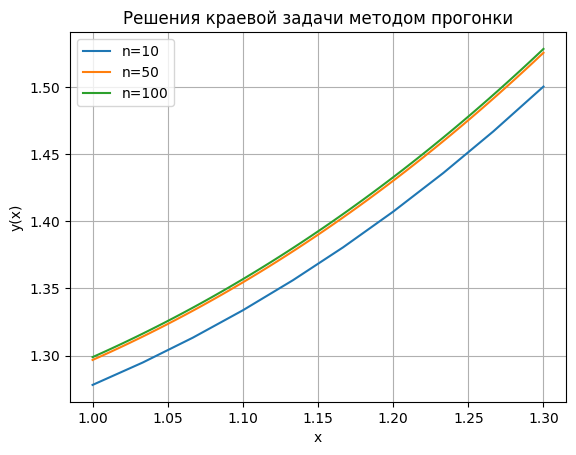

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Функции, задающие уравнение
p = lambda x: -0.5
q = lambda x: 0.5 * x
f = lambda x: 2 * x

# Метод прогонки для трехдиагональной системы
def sweep_method(a, b, c, d):
    n = len(d)
    # Прогоночные коэффициенты
    c_ = np.zeros(n)
    d_ = np.zeros(n)
    x = np.zeros(n)

    # Прямой ход
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    for i in range(1, n):
        denom = b[i] - a[i-1] * c_[i-1]
        c_[i] = c[i] / denom if i < n-1 else 0
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / denom

    # Обратный ход
    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x

def solve_bvp(n):
    a = 1.0  # левая граница (x=1)
    b = 1.3  # правая граница
    x = np.linspace(a, b, n)
    h = (b - a) / (n - 1)

    # Коэффициенты системы (размер n x n, включая границы)
    lower = np.zeros(n)  # a_i (нижняя диагональ)
    main = np.zeros(n)   # b_i (главная диагональ)
    upper = np.zeros(n)  # c_i (верхняя диагональ)
    rhs = np.zeros(n)    # d_i (правая часть)

    # Левое граничное условие y'(1) = 0.5
    # Аппроксимация: (y[1] - y[0])/h = 0.5 => -y[0] + y[1] = 0.5*h
    main[0] = -1
    upper[0] = 1
    rhs[0] = 0.5 * h

    # Уравнения для внутренних узлов
    for i in range(1, n-1):
        xi = x[i]
        lower[i] = 1/h**2 - p(xi)/(2*h)
        main[i] = -2/h**2 + q(xi)
        upper[i] = 1/h**2 + p(xi)/(2*h)
        rhs[i] = f(xi)

    # Правое граничное условие 2y(1.3) - y'(1.3) = 2
    # Аппроксимация: y'(1.3) ≈ (y[-1] - y[-2])/h
    # Условие: 2y[-1] - (y[-1] - y[-2])/h = 2
    # => (2 - 1/h)y[-1] + (1/h)y[-2] = 2
    lower[-1] = 1/h
    main[-1] = 2 - 1/h
    rhs[-1] = 2

    # Решаем систему
    y = sweep_method(lower[1:], main, upper[:-1], rhs)

    return x, y

# Решение для 3 сеток
n_values = [10, 50, 100]
solutions = []

for n in n_values:
    x, y = solve_bvp(n)
    solutions.append((x, y))

# Построение графиков
for i, (x, y) in enumerate(solutions):
    plt.plot(x, y, label=f'n={n_values[i]}')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решения краевой задачи методом прогонки')
plt.legend()
plt.grid(True)
plt.show()

## третье задание

Проверка базисных функций на однородные граничные условия:
phi_0: phi'(1) = -6.00e-13, 2*phi(1.3) - phi'(1.3) = -6.00e-13 => OK
phi_1: phi'(1) = 1.80e-13, 2*phi(1.3) - phi'(1.3) = -1.80e-13 => OK
phi_2: phi'(1) = -4.05e-14, 2*phi(1.3) - phi'(1.3) = -4.05e-14 => OK


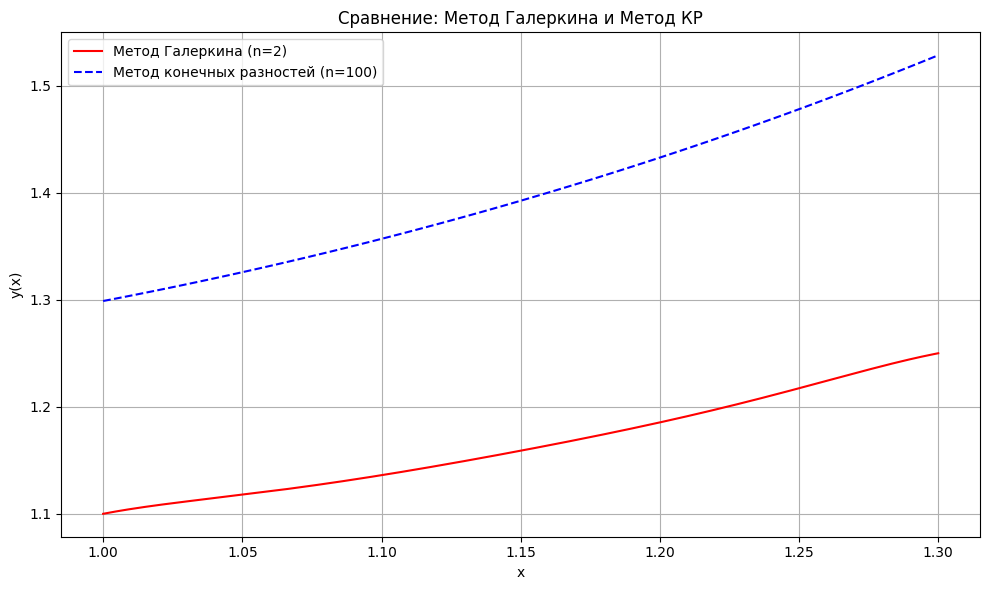

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Уравнение: y'' - 0.5 y' + 0.5x y = 2x
p = lambda x: -0.5
q = lambda x: 0.5 * x
f = lambda x: 2 * x

# Частное решение y0(x), удовлетворяющее граничным условиям
def y0(x):
    return 0.5 * x + 0.6  # Проверено: y0'(1) = 0.5, 2*y0(1.3) - y0'(1.3) = 2

def dy0(x):
    return 0.5

# Базисные функции, удовлетворяющие однородным граничным условиям
phi = [
    lambda x: (x - 1)**2 * (x - 1.3)**2,
    lambda x: (x - 1)**2 * (x - 1.3)**2 * (x - 1.15),
    lambda x: (x - 1)**2 * (x - 1.3)**2 * (x - 1.15)**2
]

# Численное дифференцирование
def differentiate(f, dx=1e-6):
    return lambda x: (f(x + dx) - f(x - dx)) / (2 * dx)

dphi = [differentiate(fi) for fi in phi]
ddphi = [differentiate(dfi) for dfi in dphi]

# Проверка однородных граничных условий
def check_basis(phi_list, dphi_list):
    print("Проверка базисных функций на однородные граничные условия:")
    for i, (phi_i, dphi_i) in enumerate(zip(phi_list, dphi_list)):
        bc1 = dphi_i(1.0)
        bc2 = 2 * phi_i(1.3) - dphi_i(1.3)
        print(f"phi_{i}: phi'(1) = {bc1:.2e}, 2*phi(1.3) - phi'(1.3) = {bc2:.2e} => "
              f"{'OK' if abs(bc1) < 1e-8 and abs(bc2) < 1e-8 else 'НЕ OK'}")

check_basis(phi, dphi)

# Квадратурная формула Гаусса
def gauss_integrate(func, a, b, n=5):
    xg, wg = np.polynomial.legendre.leggauss(n)
    x_mapped = 0.5 * (xg + 1) * (b - a) + a
    return 0.5 * (b - a) * np.sum(wg * func(x_mapped))

# Метод Галеркина
def galerkin_solve(phi, dphi, ddphi, n=2):
    a, b = 1.0, 1.3
    m = n + 1
    A = np.zeros((m, m))
    B = np.zeros(m)

    for i in range(m):
        for j in range(m):
            integrand_A = lambda x: (
                ddphi[j](x) * phi[i](x) +
                p(x) * dphi[j](x) * phi[i](x) +
                q(x) * phi[j](x) * phi[i](x)
            )
            A[i, j] = gauss_integrate(integrand_A, a, b)

        integrand_B = lambda x: (
            f(x) * phi[i](x) -
            (ddphi[i](x) * y0(x) + p(x) * dphi[i](x) * dy0(x) + q(x) * y0(x) * phi[i](x))
        )
        B[i] = gauss_integrate(integrand_B, a, b)

    c = np.linalg.solve(A, B)

    x_vals = np.linspace(a, b, 200)
    y_vals = y0(x_vals)
    for i in range(m):
        y_vals += c[i] * phi[i](x_vals)

    return x_vals, y_vals

# Метод прогонки (трёхдиагональная система)
def sweep_method(a, b, c, d):
    n = len(d)
    P = np.zeros(n)
    Q = np.zeros(n)
    x = np.zeros(n)

    P[0] = c[0] / b[0]
    Q[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i - 1] * P[i - 1]
        P[i] = c[i] / denom if i < n - 1 else 0
        Q[i] = (d[i] - a[i - 1] * Q[i - 1]) / denom

    x[-1] = Q[-1]
    for i in reversed(range(n - 1)):
        x[i] = Q[i] - P[i] * x[i + 1]

    return x

# Метод конечных разностей
def solve_bvp(n):    return x, y

# Решения
x_gal1, y_gal1 = galerkin_solve(phi, dphi, ddphi, n=2)
x_fd1, y_fd1 = solve_bvp(100)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_gal1, y_gal1, label='Метод Галеркина (n=2)', color='red')
plt.plot(x_fd1, y_fd1, '--', label='Метод конечных разностей (n=100)', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Сравнение: Метод Галеркина и Метод КР')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Проверка граничных условий для фи0:
phi0'(1) = 0.4999999999999998 (должно быть 0.5)
2*phi0(1.3) - phi0'(1.3) = 1.9999999999999996 (должно быть 2)

Проверка однородных граничных условий для фи1 и фи2:
phi1'(1) = 0.0 (должно быть 0)
2*phi1(1.3) - phi1'(1.3) = 0.0 (должно быть 0)
phi2'(1) = 0.0 (должно быть 0)
2*phi2(1.3) - phi2'(1.3) = 0.0 (должно быть 0)


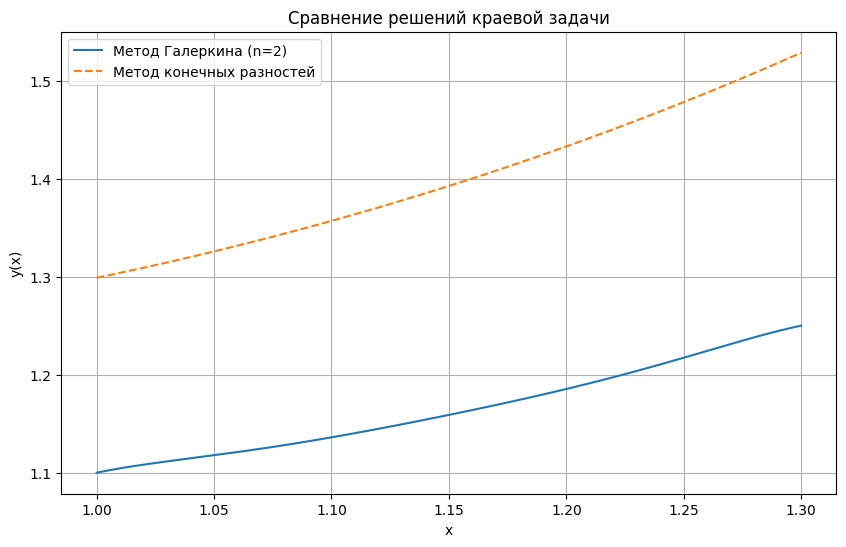

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import solve

# Исходное уравнение: y'' - 0.5*y' + 0.5*x*y = 2x
# Граничные условия:
# y'(1) = 0.5
# 2y(1.3) - y'(1.3) = 2

# Метод Галеркина с полиномиальными базисными функциями

# Определим граничные условия
x0 = 1.0
x1 = 1.3

A = np.array([[1, 2], [1.6, 0.78]])
B = np.array([0.5, 2])
b, c = solve(A, B)
a = 0.0

def phi0(x):
    return a + b*x + c*x**2

def dphi0(x):
    return b + 2*c*x

def ddphi0(x):
    return 2*c

# Проверим, что фи0 удовлетворяет граничным условиям
print("Проверка граничных условий для фи0:")
print(f"phi0'(1) = {dphi0(1)} (должно быть 0.5)")
print(f"2*phi0(1.3) - phi0'(1.3) = {2*phi0(1.3) - dphi0(1.3)} (должно быть 2)")


def phi1(x):
    return (x - 1)**2 * (x - 1.3)

def dphi1(x):
    return 2*(x-1)*(x-1.3) + (x-1)**2

def ddphi1(x):
    return 2*(x-1.3) + 4*(x-1) + 2*(x-1)

def phi2(x):
    return (x - 1)**2 * (x - 1.3)**2

def dphi2(x):
    return 2*(x-1)*(x-1.3)**2 + 2*(x-1)**2*(x-1.3)

def ddphi2(x):
    return 2*(x-1.3)**2 + 8*(x-1)*(x-1.3) + 2*(x-1)**2

# Проверим, что фи1 и фи2 удовлетворяют однородным граничным условиям
print("\nПроверка однородных граничных условий для фи1 и фи2:")
print(f"phi1'(1) = {dphi1(1)} (должно быть 0)")
print(f"2*phi1(1.3) - phi1'(1.3) = {2*phi2(1.3) - dphi2(1.3)} (должно быть 0)")
print(f"phi2'(1) = {dphi2(1)} (должно быть 0)")
print(f"2*phi2(1.3) - phi2'(1.3) = {2*phi2(1.3) - dphi2(1.3)} (должно быть 0)")

# Приближенное решение: y(x) ≈ фи0(x) + c1*фи1(x) + c2*фи2(x)
# Подставим в уравнение и применим метод Галеркина

# Определим функции для подстановки в уравнение
def L(phi, x):
    """Оператор L(phi) = phi'' - 0.5*phi' + 0.5*x*phi"""
    return ddphi0(x) - 0.5*dphi0(x) + 0.5*x*phi0(x)

def L_phi1(phi, x):
    return ddphi1(x) - 0.5*dphi1(x) + 0.5*x*phi1(x)

def L_phi2(phi, x):
    return ddphi2(x) - 0.5*dphi2(x) + 0.5*x*phi2(x)

# Правая часть уравнения
def f(x):
    return 2*x

# Построим систему уравнений для c1 и c2
def integrand1(x):
    return (L(phi0, x) - f(x)) * phi1(x)

def integrand2(x):
    return (L(phi0, x) - f(x)) * phi2(x)

def integrand11(x):
    return L_phi1(phi1, x) * phi1(x)

def integrand12(x):
    return L_phi2(phi2, x) * phi1(x)

def integrand21(x):
    return L_phi1(phi1, x) * phi2(x)

def integrand22(x):
    return L_phi2(phi2, x) * phi2(x)

# Вычислим интегралы
I1, _ = quad(integrand1, x0, x1)
I2, _ = quad(integrand2, x0, x1)

I11, _ = quad(integrand11, x0, x1)
I12, _ = quad(integrand12, x0, x1)

I21, _ = quad(integrand21, x0, x1)
I22, _ = quad(integrand22, x0, x1)

# Система уравнений:
# c1*I11 + c2*I12 = -I1
# c1*I21 + c2*I22 = -I2

A_galerkin = np.array([[I11, I12], [I21, I22]])
B_galerkin = np.array([-I1, -I2])

c1, c2 = solve(A_galerkin, B_galerkin)

# Получим приближенное решение
def y_galerkin(x):
    return phi0(x) + c1*phi1(x) + c2*phi2(x)

# Метод конечных разностей для сравнения
def solve_bvp(N=100): return x, y

# Получаем решение методом конечных разностей
x_fd, y_fd = solve_bvp()

# Вычисляем решение методом Галеркина в тех же точках
y_gal = np.array([y_galerkin(xi) for xi in x_fd])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x_gal1, y_gal1, label='Метод Галеркина (n=2)')
plt.plot(x_fd, y_fd, '--', label='Метод конечных разностей')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Сравнение решений краевой задачи')
plt.legend()
plt.grid(True)
plt.show()

# **Варя вар 1**

## первое задание

 x     | Численное решение |   Точное решение  | Погрешность
-------|-------------------|-------------------|------------
0.00   | 0.000000000000000 | 0.000000000000000 | 0.000e+00
0.10   | 0.011990689863162 | 0.010000000000000 | 1.991e-03
0.20   | 0.044001187585659 | 0.040000000000000 | 4.001e-03
0.30   | 0.095991745058599 | 0.090000000000000 | 5.992e-03
0.40   | 0.167824777643910 | 0.160000000000000 | 7.825e-03
0.50   | 0.259268805841154 | 0.250000000000000 | 9.269e-03
0.60   | 0.370004590934731 | 0.360000000000000 | 1.000e-02
0.70   | 0.499633192226244 | 0.490000000000000 | 9.633e-03
0.80   | 0.647685599121086 | 0.640000000000000 | 7.686e-03
0.90   | 0.813633538198335 | 0.810000000000000 | 3.634e-03
1.00   | 1.000000000000000 | 1.000000000000000 | 0.000e+00


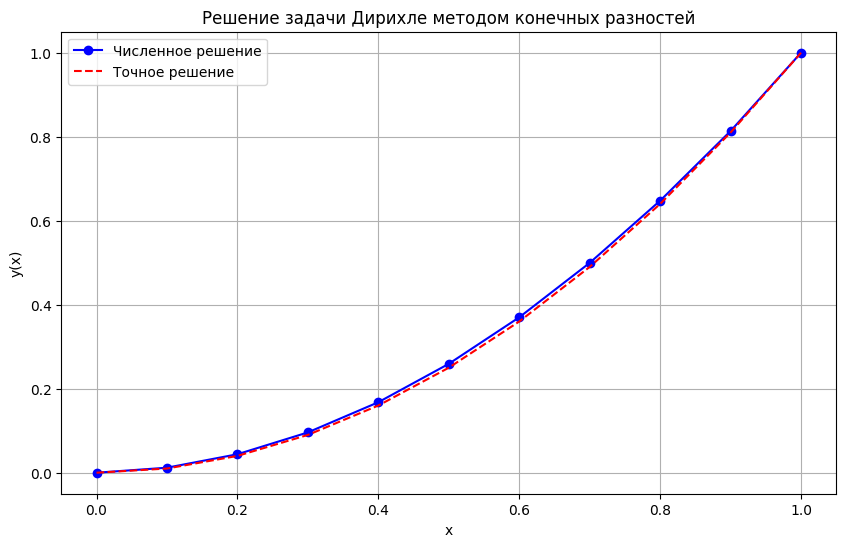

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Функции, определяющие уравнение
p = lambda x: x
q = lambda x: -2
f = lambda x: 2
exact_solution = lambda x: x**2

def sweep_method(a, b, c, d):
    """
    Решение трехдиагональной системы методом прогонки
    a - нижняя диагональ (размер n-1)
    b - главная диагональ (размер n)
    c - верхняя диагональ (размер n-1)
    d - правая часть (размер n)
    """
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)

    # Прямой ход
    alpha[0] = -c[0] / b[0]
    beta[0] = d[0] / b[0]

    for i in range(1, n-1):
        denominator = b[i] + a[i-1] * alpha[i-1]
        alpha[i] = -c[i] / denominator
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / denominator

    # Обратный ход
    y = np.zeros(n)
    y[-1] = (d[-1] - a[-1] * beta[-2]) / (b[-1] + a[-1] * alpha[-2])

    for i in range(n-2, -1, -1):
        y[i] = alpha[i] * y[i+1] + beta[i]

    return y

# Параметры задачи
a = 0
b = 1
n = 11  # 10 интервалов, 11 узлов
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)

# Инициализация коэффициентов
lower = np.zeros(n-2)  # Нижняя диагональ (a_i), размер n-2
main = np.zeros(n-2)   # Главная диагональ (b_i), размер n-2
upper = np.zeros(n-2)   # Верхняя диагональ (c_i), размер n-2
rhs = np.zeros(n-2)     # Правая часть (d_i), размер n-2

# Заполнение коэффициентов
for i in range(1, n-1):
    xi = x[i]

    lower[i-1] = 1/h**2 - p(xi)/(2*h)   # a_i
    main[i-1] = -2/h**2 + q(xi)         # b_i
    upper[i-1] = 1/h**2 + p(xi)/(2*h)   # c_i
    rhs[i-1] = f(xi)                     # d_i

    # Учет граничных условий
    if i == 1:
        rhs[i-1] -= lower[i-1] * 0  # y(0) = 0
    elif i == n-2:
        rhs[i-1] -= upper[i-1] * 1  # y(1) = 1

# Решение системы методом прогонки
y_inner = sweep_method(lower, main, upper, rhs)

# Формирование полного решения
y = np.zeros(n)
y[0] = 0      # Левое граничное условие
y[-1] = 1     # Правое граничное условие
y[1:-1] = y_inner

# Расчет погрешности
y_exact = exact_solution(x)
error = np.abs(y - y_exact)

# Вывод результатов
print(" x     | Численное решение |   Точное решение  | Погрешность")
print("-------|-------------------|-------------------|------------")
for i in range(n):
    print(f"{x[i]:.2f}   | {y[i]:.15f} | {y_exact[i]:.15f} | {error[i]:.3e}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo-', label='Численное решение')
plt.plot(x, y_exact, 'r--', label='Точное решение')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение задачи Дирихле методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()

## второе задание

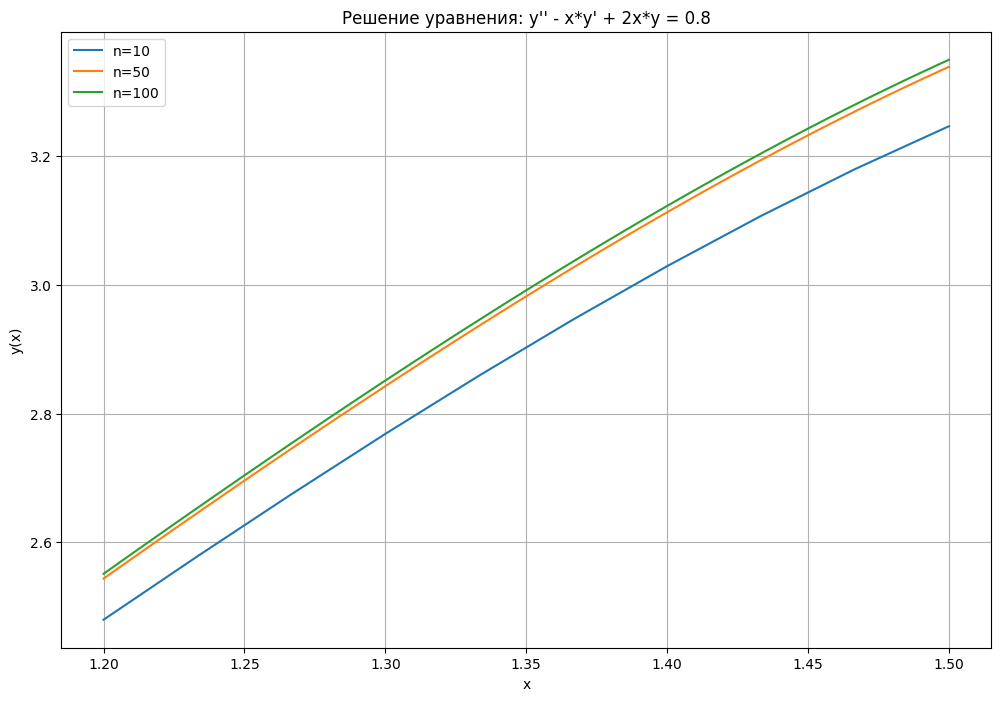

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Функции, задающие уравнение
# Уравнение: y'' - x*y' + 2x*y = 0.8
p = lambda x: -x      # коэффициент перед y'
q = lambda x: 2*x     # коэффициент перед y
f = lambda x: 0.8     # правая часть уравнения

# Метод прогонки для трехдиагональной системы
def sweep_method(a, b, c, d):
    n = len(d)
    # Прогоночные коэффициенты
    c_ = np.zeros(n)
    d_ = np.zeros(n)
    x = np.zeros(n)

    # Прямой ход
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]
    for i in range(1, n):
        denom = b[i] - a[i-1]*c_[i-1]
        c_[i] = c[i]/denom if i < n-1 else 0
        d_[i] = (d[i] - a[i-1]*d_[i-1])/denom

    # Обратный ход
    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i]*x[i+1]

    return x

def solve_bvp1(n):
    a = 1.2  # левая граница (x=1.2)
    b = 1.5  # правая граница (x=1.5)
    x = np.linspace(a, b, n)
    h = (b - a)/(n - 1)

    # Коэффициенты системы
    lower = np.zeros(n)  # нижняя диагональ (a[i])
    main = np.zeros(n)   # главная диагональ (b[i])
    upper = np.zeros(n)  # верхняя диагональ (c[i])
    rhs = np.zeros(n)    # правая часть (d[i])

    # Левое граничное условие: y(1.2) - 0.5y'(1.2) = 1
    # Аппроксимация производной: y' ≈ (y[1] - y[0])/h
    # Получаем: y[0] - 0.5*(y[1] - y[0])/h = 1
    # => (1 + 0.5/h)y[0] - (0.5/h)y[1] = 1
    main[0] = 1 + 0.5/h
    upper[0] = -0.5/h
    rhs[0] = 1

    # Уравнения для внутренних узлов
    for i in range(1, n-1):
        xi = x[i]
        lower[i] = 1/h**2 - p(xi)/(2*h)   # коэффициент при y[i-1]
        main[i] = -2/h**2 + q(xi)         # коэффициент при y[i]
        upper[i] = 1/h**2 + p(xi)/(2*h)   # коэффициент при y[i+1]
        rhs[i] = f(xi)                     # правая часть

    # Правое граничное условие: y'(1.5) = 2
    # Аппроксимация производной: y' ≈ (y[-1] - y[-2])/h
    # Получаем: (y[-1] - y[-2])/h = 2
    # => -y[-2] + y[-1] = 2*h
    lower[-1] = -1
    main[-1] = 1
    rhs[-1] = 2*h

    # Решаем систему
    y = sweep_method(lower[1:], main, upper[:-1], rhs)

    return x, y

# Решение для трех сеток
n_values = [10, 50, 100]
solutions = []

for n in n_values:
    x, y = solve_bvp1(n)
    solutions.append((x, y))

# Построение графиков
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(solutions):
    plt.plot(x, y, label=f'n={n_values[i]}')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение уравнения: y\'\' - x*y\' + 2x*y = 0.8')
plt.legend()
plt.grid(True)
plt.show()

## третье задание


Проверка граничных условий:
phi0: y'(1.5) = 2.0 (должно быть 2)
phi0: y(1.2) - 0.5 y'(1.2) = 1.0 (должно быть 1)
phi1: y'(1.5) = 0.0 (должно быть 0)
phi1: y(1.2) - 0.5 y'(1.2) = 0.0 (должно быть 0)
phi2: y'(1.5) = -0.0 (должно быть 0)
phi2: y(1.2) - 0.5 y'(1.2) = -0.0 (должно быть 0)


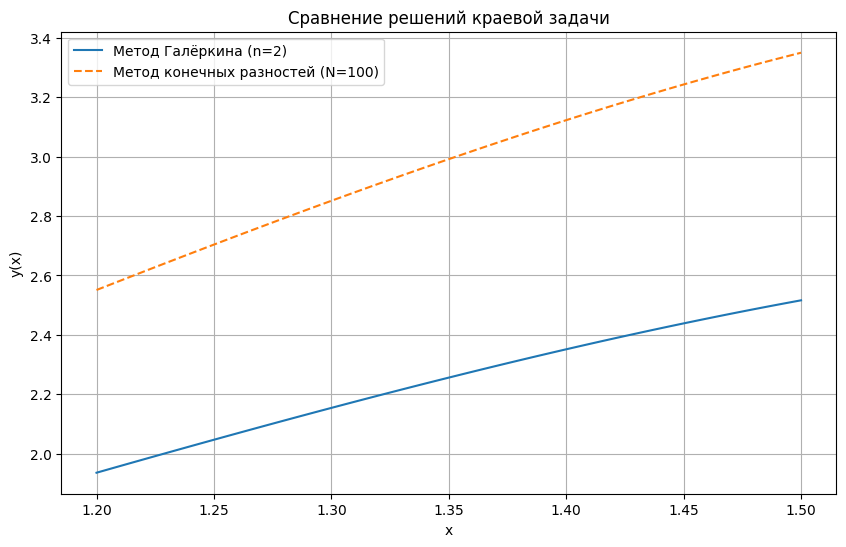

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import solve

# Границы
a = 1.2
b = 1.5

# Метод Галёркина
def galerkin_method(n=2):
    # Базисная функция phi0(x) = A x^2 + B x + C (удовлетворяет неоднородным условиям)
    # Условия:
    # 1) phi0(a) - 0.5 phi0'(a) = 1
    # 2) phi0'(b) = 2
    # Решаем систему для A, B, C:
    # phi0'(x) = 2 A x + B
    # Условие 2: 2 A b + B = 2
    # Условие 1: A a^2 + B a + C - 0.5*(2 A a + B) = 1
    A = np.zeros((3, 3))
    F = np.zeros(3)
    A[0, 0] = 2 * b  # A из условия 2
    A[0, 1] = 1       # B из условия 2
    A[0, 2] = 0       # C из условия 2
    F[0] = 2
    A[1, 0] = a**2 - a  # A из условия 1
    A[1, 1] = a - 0.5    # B из условия 1
    A[1, 2] = 1           # C из условия 1
    F[1] = 1
    # Третье уравнение: произвольное (например, C = 0)
    A[2, 2] = 1
    F[2] = 0
    coeffs = solve(A, F)
    A_phi0, B_phi0, C_phi0 = coeffs

    def phi0(x):
        return A_phi0 * x**2 + B_phi0 * x + C_phi0

    def phi0_d(x):
        return 2 * A_phi0 * x + B_phi0

    def phi0_d2(x):
        return 2 * A_phi0

    # Базисные функции phi1 и phi2 (удовлетворяют однородным условиям)
    def phi1(x):
        return (x - a) * (x - b)**2

    def phi2(x):
        return (x - a)**2 * (x - b)

    # Производные phi1 и phi2
    def phi1_d(x):
        return (x - b)**2 + 2 * (x - a) * (x - b)

    def phi2_d(x):
        return 2 * (x - a) * (x - b) + (x - a)**2

    def phi1_d2(x):
        return 2 * (x - b) + 2 * (x - b) + 2 * (x - a)

    def phi2_d2(x):
        return 2 * (x - b) + 2 * (x - a) + 2 * (x - a)

    # Проверка граничных условий
    print("\nПроверка граничных условий:")
    print(f"phi0: y'(1.5) = {phi0_d(b)} (должно быть 2)")
    print(f"phi0: y(1.2) - 0.5 y'(1.2) = {phi0(a) - 0.5 * phi0_d(a)} (должно быть 1)")
    print(f"phi1: y'(1.5) = {phi1_d(b)} (должно быть 0)")
    print(f"phi1: y(1.2) - 0.5 y'(1.2) = {phi1(b)} (должно быть 0)")
    print(f"phi2: y'(1.5) = {phi2(a) - 0.5 * phi2_d(a)} (должно быть 0)")
    print(f"phi2: y(1.2) - 0.5 y'(1.2) = {phi2(a) - 0.5 * phi2_d(a)} (должно быть 0)")

    # Матрица системы и вектор правой части
    A_gal = np.zeros((n, n))
    F_gal = np.zeros(n)

    for i in range(n):
        phi_i = [phi1, phi2][i]
        for j in range(n):
            phi_j = [phi1, phi2][j]
            phi_j_d = [phi1_d, phi2_d][j]
            phi_j_d2 = [phi1_d2, phi2_d2][j]

            def integrand(x):
                return (phi_j_d2(x) - x * phi_j_d(x) + 2 * x * phi_j(x)) * phi_i(x)

            A_gal[i, j], _ = quad(integrand, a, b)

        def integrand_F(x):
            return (0.8 - (phi0_d2(x) - x * phi0_d(x) + 2 * x * phi0(x))) * phi_i(x)

        F_gal[i], _ = quad(integrand_F, a, b)

    # Решаем систему A_gal * c = F_gal
    c = solve(A_gal, F_gal)

    # Функция приближенного решения
    def y_approx(x):
        return phi0(x) + c[0] * phi1(x) + c[1] * phi2(x)

    return y_approx

# Метод конечных разностей
def solve_bvp1(N=100):
    return x, y

# Получаем решения
y_galerkin = galerkin_method()
x_fd, y_fd = solve_bvp1()

# График
x_plot = np.linspace(a, b, 100)
y_galerkin_plot = np.array([y_galerkin(x) for x in x_plot])

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_galerkin_plot, label='Метод Галёркина (n=2)')
plt.plot(x_fd, y_fd, '--', label='Метод конечных разностей (N=100)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.title('Сравнение решений краевой задачи')
plt.show()